In [ ]:
# Using LangChain + ChatGPT to analyze data.

%pip install langchain
%pip install langchain_experimental
%pip install openai
%pip install langchain-openai
%pip install pandas
%pip install tabulate
%pip install openpyxl
%pip install xlsxwriter
%pip install matplotlib
%pip install google-search-results


In [25]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
# from langchain_openai import OpenAI
from langchain_openai import AzureOpenAI
import pandas as pd

df = pd.read_csv('perfumes.csv', delimiter=';')
df = df.fillna(0)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257753 entries, 0 to 257752
Data columns (total 8 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Year                                   257753 non-null  int64  
 1   Month of the year                      257753 non-null  int64  
 2   Transaction ID                         257753 non-null  int64  
 3   Product                                257753 non-null  object 
 4   Product Category (Enhanced Ecommerce)  257753 non-null  object 
 5   Product Brand                          257753 non-null  object 
 6   Product Revenue                        257753 non-null  float64
 7   Quantity                               257753 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.7+ MB


,Year,Month of the year,Transaction ID,Product,Product Category (Enhanced Ecommerce),Product Brand,Product Revenue,Quantity
0,2021,1,140305,Artdeco - - Rubicell Mini Applicator For Duo ...,Maquilhagem,Artdeco,0.1,1
1,2021,1,140306,Artdeco - - Rubicell Mini Applicator For Duo ...,Maquilhagem,Artdeco,0.1,1
2,2021,1,140307,Artdeco - - Rubicell Mini Applicator For Duo ...,Maquilhagem,Artdeco,0.1,1
3,2021,1,140308,Artdeco - - Rubicell Mini Applicator For Duo ...,Maquilhagem,Artdeco,0.1,1
4,2021,1,140309,Artdeco - - Rubicell Mini Applicator For Duo ...,Maquilhagem,Artdeco,0.1,1


### Agent

In [ ]:
import os
# os.environ["OPENAI_API_KEY"] = "sk-xxx"
os.environ["OPENAI_API_VERSION"] = "2023-05-15"
os.environ["AZURE_OPENAI_API_KEY"] = ""
os.environ["AZURE_OPENAI_ENDPOINT"] = ""
# print(os.getenv("OPENAI_API_VERSION"), os.getenv("AZURE_OPENAI_API_KEY"), os.getenv("AZURE_OPENAI_ENDPOINT"))

In [27]:
# agent = create_pandas_dataframe_agent(OpenAI(), df, verbose=True)
deployment_name = "openai-gpt-35-turbo-instruct"
openai_llm = AzureOpenAI(api_key=os.getenv("AZURE_OPENAI_API_KEY"), api_version=os.getenv("OPENAI_API_VERSION"), azure_endpoint=os.getenv("AZURE_OPENAI_ENDPOINT"), deployment_name=deployment_name)
# print(openai_llm.model_name)
agent = create_pandas_dataframe_agent(openai_llm, df, verbose=True)


gpt-3.5-turbo-instruct


### Query

In [28]:
agent.invoke('tell me which product category had the most revenue, the value and best selling product in the category')



> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by product category and then find the maximum revenue. Then I can find the product with the highest revenue in that category.
Action: python_repl_ast
Action Input: df.groupby('Product Category (Enhanced Ecommerce)').sum().sort_values('Product Revenue', ascending=False).head(1)                                            Year  Month of the year  \
Product Category (Enhanced Ecommerce)                                 
Perfumes                               192290782             573599   

                                       Transaction ID  \
Product Category (Enhanced Ecommerce)                   
Perfumes                                  40517439367   

                                                                                 Product  \
Product Category (Enhanced Ecommerce)                                                      
Perfumes                               Yves Saint Laurent - Libre - Eau de

{'input': 'tell me which product category had the most revenue, the value and best selling product in the category',
 'output': 'The product category with the most revenue is Perfumes with a revenue of 6226603.75. The best selling product in this category is Yves Saint Laurent - Libre - Eau de Parfum 30ml.'}

In [36]:
agent.invoke('calculate the total revenue for each category and save it in an excel file called "revenue_summary.xlsx" on my computer')



> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by the Product Category and then sum the Product Revenue column. Then I can save it as an excel file.
Action: python_repl_ast
Action Input: df.groupby('Product Category (Enhanced Ecommerce)').sum()['Product Revenue'].to_excel('revenue_summary.xlsx')I now know the final answer
Final Answer: The total revenue for each category is saved in an excel file called "revenue_summary.xlsx" on my computer.

> Finished chain.


{'input': 'calculate the total revenue for each category and save it in an excel file called "revenue_summary.xlsx" on my computer',
 'output': 'The total revenue for each category is saved in an excel file called "revenue_summary.xlsx" on my computer.'}



> Entering new AgentExecutor chain...
Thought: I need to group the dataframe by category and then sum the revenue for each category. Then I can plot a bar chart with the top 8 categories.
Action: python_repl_ast
Action Input: df.groupby('Category')['Revenue'].sum()KeyError: 'Category' I need to check the column names in the dataframe
Action: python_repl_ast
Action Input: df.columnsIndex(['Year', 'Month of the year', 'Transaction ID', 'Product',
       'Product Category (Enhanced Ecommerce)', 'Product Brand',
       'Product Revenue', 'Quantity'],
      dtype='object') The column name for category is 'Product Category (Enhanced Ecommerce)'
Action: python_repl_ast
Action Input: df.groupby('Product Category (Enhanced Ecommerce)')['Product Revenue'].sum()Product Category (Enhanced Ecommerce)
Acessórios de Moda        337.00
Acessórios manicure      1573.45
Adelgaçantes              879.55
Adornos                   139.39
After Sun Corpo         12010.62
                         ...    
T

{'input': 'show a bar chart of revenue in millions by category for the top 8 categories',
 'output': 'A bar chart showing the top 8 categories by revenue in millions.'}

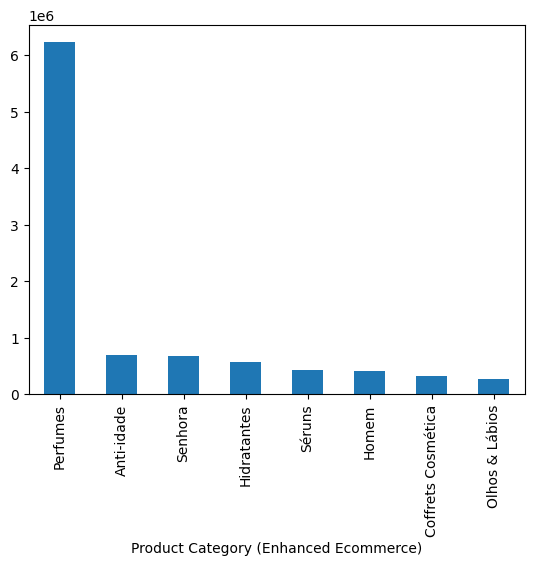

In [37]:
agent.invoke('show a bar chart of revenue in millions by category for the top 8 categories')

In [38]:
query = """
Create a new Excel file called "analise_perfumes.xlsx" and add a separator called "revenue_by_year_month". 
Then read the added dataframe that contains product recipe information. 
In the tab "revenue_by_year_month", add the columns "Year", "Month of the year" and "Product Revenue" for each "Month of The Year" 
 
Finally, save the Excel file as "analise_perfumes.xlsx" on my computer.
"""
agent.invoke(query)



> Entering new AgentExecutor chain...
Thought: I need to use the pandas library to create and modify an Excel file.
Action: python_repl_ast
Action Input: import pandas as pdNow I can use the pandas library to create a new Excel file and add the desired columns.
Action: python_repl_ast
Action Input: df.to_excel("analise_perfumes.xlsx", sheet_name="revenue_by_year_month", columns=["Year", "Month of the year", "Product Revenue"]) The dataframe has been successfully added to the tab "revenue_by_year_month". I now need to save the Excel file.
Action: python_repl_ast
Action Input: writer = pd.ExcelWriter("analise_perfumes.xlsx") I have created a writer object for the Excel file. Now I need to save the changes.
Action: python_repl_ast
Action Input: df.to_excel(writer, index=False) The changes have been saved. I can now close the writer object and save the Excel file.
Action: python_repl_ast
Action Input: writer.save()AttributeError: 'XlsxWriter' object has no attribute 'save' I need to use 

{'input': '\nCreate a new Excel file called "analise_perfumes.xlsx" and add a separator called "revenue_by_year_month". \nThen read the added dataframe that contains product recipe information. \nIn the tab "revenue_by_year_month", add the columns "Year", "Month of the year" and "Product Revenue" for each "Month of The Year" \n \nFinally, save the Excel file as "analise_perfumes.xlsx" on my computer.\n',
 'output': 'The final answer is a new Excel file called "analise_perfumes.xlsx" with a tab "revenue_by_year_month" that contains the columns "Year", "Month of the year", and "Product Revenue" for each "Month of The Year". The file has been saved on my computer.'}



> Entering new AgentExecutor chain...
Thought: We need to group the data by year and month, and then sum the revenue for each group.
Action: python_repl_ast
Action Input: df.groupby(["Year", "Month of the year"]).sum()["Product Revenue"].plot.bar()Axes(0.125,0.11;0.775x0.77) This looks like a bar plot with the revenue on the y-axis and the year-month on the x-axis.
Action: python_repl_ast
Action Input: plt.xlabel("Year-Month")NameError: name 'plt' is not defined We need to import the matplotlib.pyplot library.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt Now we can add labels and a title to the plot.
Action: python_repl_ast
Action Input: plt.xlabel("Year-Month")Text(0.5, 0, 'Year-Month') The x-label is now added.
Action: python_repl_ast
Action Input: plt.ylabel("Revenue")Text(0, 0.5, 'Revenue') The y-label is now added.
Action: python_repl_ast
Action Input: plt.title("Revenue by Year-Month")Text(0.5, 1.0, 'Revenue by Year-Month') The title is now added.
Final

{'input': 'show a chart with revenue by year-month',
 'output': 'A bar plot showing the revenue by year-month.'}

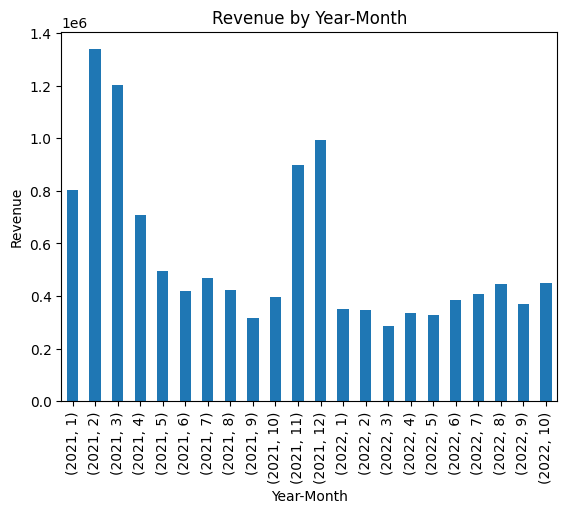

In [39]:
agent.invoke('show a chart with revenue by year-month')

In [ ]:
from typing import List, Union
import re

# Langchain imports
from langchain.agents import Tool, AgentExecutor, LLMSingleActionAgent, AgentOutputParser
from langchain.prompts import BaseChatPromptTemplate, ChatPromptTemplate
from langchain import SerpAPIWrapper, LLMChain
from langchain.schema import AgentAction, AgentFinish, HumanMessage, SystemMessage
# LLM wrapper
# from langchain_openai import ChatOpenAI
from langchain_openai import AzureChatOpenAI
# from langchain import OpenAI
# Conversational memory
from langchain.memory import ConversationBufferWindowMemory

# set SERPAPI_API_KEY env
search = SerpAPIWrapper()

# Define a list of tools
tools = [
    Tool(
        name = "Search",
        func=search.run,
        description="useful for when you need to answer questions about current events"
    )
]

# Set up the prompt with input variables for tools, user input and a scratchpad for the model to record its workings
template = """Answer the following questions as best you can, but speaking as a pirate might speak. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin! Remember to speak as a pirate when giving your final answer. Use lots of "Arg"s

Question: {input}
{agent_scratchpad}"""


# Set up a prompt template
class CustomPromptTemplate(BaseChatPromptTemplate):
    # The template to use
    template: str
    # The list of tools available
    tools: List[Tool]
    
    def format_messages(self, **kwargs) -> str:
        # Get the intermediate steps (AgentAction, Observation tuples)
        
        # Format them in a particular way
        intermediate_steps = kwargs.pop("intermediate_steps")
        thoughts = ""
        for action, observation in intermediate_steps:
            thoughts += action.log
            thoughts += f"\nObservation: {observation}\nThought: "
            
        # Set the agent_scratchpad variable to that value
        kwargs["agent_scratchpad"] = thoughts
        
        # Create a tools variable from the list of tools provided
        kwargs["tools"] = "\n".join([f"{tool.name}: {tool.description}" for tool in self.tools])
        
        # Create a list of tool names for the tools provided
        kwargs["tool_names"] = ", ".join([tool.name for tool in self.tools])
        formatted = self.template.format(**kwargs)
        return [HumanMessage(content=formatted)]
    
prompt = CustomPromptTemplate(
    template=template,
    tools=tools,
    # This omits the `agent_scratchpad`, `tools`, and `tool_names` variables because those are generated dynamically
    # This includes the `intermediate_steps` variable because that is needed
    input_variables=["input", "intermediate_steps"]
)

class CustomOutputParser(AgentOutputParser):
    
    def parse(self, llm_output: str) -> Union[AgentAction, AgentFinish]:
        
        # Check if agent should finish
        if "Final Answer:" in llm_output:
            return AgentFinish(
                # Return values is generally always a dictionary with a single `output` key
                # It is not recommended to try anything else at the moment :)
                return_values={"output": llm_output.split("Final Answer:")[-1].strip()},
                log=llm_output,
            )
        
        # Parse out the action and action input
        regex = r"Action: (.*?)[\n]*Action Input:[\s]*(.*)"
        match = re.search(regex, llm_output, re.DOTALL)
        
        # If it can't parse the output it raises an error
        # You can add your own logic here to handle errors in a different way i.e. pass to a human, give a canned response
        if not match:
            raise ValueError(f"Could not parse LLM output: `{llm_output}`")
        action = match.group(1).strip()
        action_input = match.group(2)
        
        # Return the action and action input
        return AgentAction(tool=action, tool_input=action_input.strip(" ").strip('"'), log=llm_output)
    
output_parser = CustomOutputParser()

# Initiate our LLM - default is 'gpt-3.5-turbo'
# llm = ChatOpenAI(temperature=0)
llm = AzureChatOpenAI(temperature=0, deployment_name="openai-gpt-35-turbo")

# LLM chain consisting of the LLM and a prompt
llm_chain = LLMChain(llm=llm, prompt=prompt)

# Using tools, the LLM chain and output_parser to make an agent
tool_names = [tool.name for tool in tools]

agent = LLMSingleActionAgent(
    llm_chain=llm_chain, 
    output_parser=output_parser,
    # We use "Observation" as our stop sequence so it will stop when it receives Tool output
    # If you change your prompt template you'll need to adjust this as well
    stop=["\nObservation:"], 
    allowed_tools=tool_names
)

# Initiate the agent that will respond to our queries
# Set verbose=True to share the CoT reasoning the LLM goes through
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True)

In [ ]:
agent_executor.run("How many people live in canada as of 2023?")

In [53]:
# Set up a prompt template which can interpolate the history
template_with_history = """You are SearchGPT, a professional search engine who provides informative answers to users. Answer the following questions as best you can. You have access to the following tools:

{tools}

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [{tool_names}]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin! Remember to give detailed, informative answers

Previous conversation history:
{history}

New question: {input}
{agent_scratchpad}"""

In [54]:
prompt_with_history = CustomPromptTemplate(
    template=template_with_history,
    tools=tools,
    # The history template includes "history" as an input variable so we can interpolate it into the prompt
    input_variables=["input", "intermediate_steps", "history"]
)

llm_chain = LLMChain(llm=llm, prompt=prompt_with_history)
tool_names = [tool.name for tool in tools]
agent = LLMSingleActionAgent(
    llm_chain=llm_chain, 
    output_parser=output_parser,
    stop=["\nObservation:"], 
    allowed_tools=tool_names
)

In [55]:
# Initiate the memory with k=2 to keep the last two turns
# Provide the memory to the agent
memory = ConversationBufferWindowMemory(k=2)
agent_executor = AgentExecutor.from_agent_and_tools(agent=agent, tools=tools, verbose=True, memory=memory)

In [56]:
agent_executor.run("How many people live in canada as of 2023?")



> Entering new AgentExecutor chain...
Thought: I need to find the most recent population data for Canada.
Action: Search
Action Input: "Canada population 2023"

Observation:40.77 million
This data seems reliable, but I should double-check with a reputable source.
Action: Search
Action Input: "Official Canada population 2023"

Observation:40.77 million
I now know the final answer
Final Answer: As of 2023, the population of Canada is 40.77 million.

> Finished chain.


'As of 2023, the population of Canada is 40.77 million.'

In [57]:
agent_executor.run("how about in mexico?")



> Entering new AgentExecutor chain...
Thought: I need to find out the current population of Mexico.
Action: Search
Action Input: "current population of Mexico"

Observation:{'type': 'population_result', 'place': 'Mexico', 'population': '127.5 million', 'year': '2022'}
I now have the current population of Mexico.
Final Answer: The current population of Mexico as of 2022 is 127.5 million.

> Finished chain.


'The current population of Mexico as of 2022 is 127.5 million.'

In [ ]:
# messages = [
#     SystemMessage(
#         content="You are a helpful assistant that translates English to French."
#     ),
#     HumanMessage(
#         content="Translate this sentence from English to French. I love programming."
#     ),
# ]
# chat.invoke(messages)
# template = (
#     "You are a helpful assistant that translates {input_language} to {output_language}."
# )
# system_message_prompt = SystemMessagePromptTemplate.from_template(template)
# human_template = "{text}"
# human_message_prompt = HumanMessagePromptTemplate.from_template(human_template)
# chat_prompt = ChatPromptTemplate.from_messages(
#     [system_message_prompt, human_message_prompt]
# )
# 
# # get a chat completion from the formatted messages
# chat.invoke(
#     chat_prompt.format_prompt(
#         input_language="English", output_language="French", text="I love programming."
#     ).to_messages()
# )